# Bioinfo Projekt Gruppe 4-4: k-means 
*Members: Benedict, Julia, Thorge and Marilena*
## Tasks

Implement the following algorithms in python using the numpy library:

1. implement k-means:

1. compare your implementation with the sklearn implementation with respect to quality and speed
  implement mini-batch k-means:

1. compare your implementation with the sklearn implementation with respect to quality and speed
  implement k-means++ initialization:

1. Compare the runtime and quality of your k-means implementation and your mini batch k-means implementation for  different datasets. You can use code from sklearn to generate datasets of arbitrary size and difficulty  (https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py). You should generate multiple plots to visualize the comparison (eg. you can plot the runtinme / cluster quality for different dataset sizes / number of clusters)

1. Cluster the 3K PBMCs from a Healthy Donor Dataset from 10x Genomics
1. use scanpy to load the data ( see https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)
1. compare the performance of your implementations with the sklearn implementations

#### Daten laden

In [3]:
import matplotlib.pyplot as plt
import urllib.request as url
import numpy as np
import scanpy as sc
import pandas as pd
import tarfile
import csv

#### Lädt Dateien von der Seite und wandelt sie in verschiedene Formate um:

In [6]:
class Data():
    def __init__(self, data):
        self.data = tarfile.open(url.urlretrieve(data, filename= None)[0]).extractall()
        self.source = './filtered_gene_bc_matrices/hg19/'
        self.matrix = sc.read_10x_mtx(self.source ,var_names='gene_symbols',cache=True)
    
    def convtomtx(self):                                # converts to scanpy matrix 
        return self.matrix
        
    def convtoarray(self):                              # converts data to numpy arrays
        self.matrix.var_names_make_unique()
        ar_data = self.matrix._X.todense().getA()
        return ar_data
    
    def convtodf(self):                                 # converts data to pandas dataframe
        df_data = self.matrix.to_df()
        return df_data
        
    def getcolnames(self):                              #returns column names as a list
        columns = []
        with open(self.source + "genes.tsv") as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                columns.append(row[1])
            return columns

    def getrownames(self):                               #returns row names as a list
        rows = []
        with open(self.source + "barcodes.tsv") as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                rows.append(row[0]) 
        return rows



In [7]:
daten = Data("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

#### Conversion to scanpy matrix, numpy arrays and pandas dataframe 

In [13]:
adata = daten.convtomtx()
ar_pbmc = daten.convtoarray()
df_pbmc = daten.convtodf()

#### Get row and column names

In [17]:
rows = daten.getrownames()
columns = daten.getcolnames()

## Visualisierung
#### Erstellt ein Diagramm wie auf der Seite gezeigt: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
Siehe hier (https://anndata.readthedocs.io/en/latest/anndata.AnnData.html#anndata.AnnData) was alles mit *adata* möglich ist

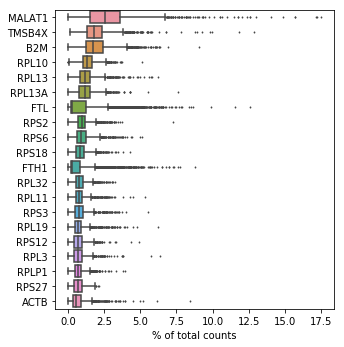

In [14]:
adata.var_names_make_unique()
sc.pl.highest_expr_genes(adata, n_top=20)

#### Quick Overview over Dataset:

In [15]:
df_pbmc.describe()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
count,2700.0,2700.0,2700.0,2700.0,2700.0,2700.000000,2700.0,2700.0,2700.000000,2700.0,...,2700.0,2700.0,2700.0,2700.000000,2700.000000,2700.0,2700.0,2700.0,2700.0,2700.0
mean,0.0,0.0,0.0,0.0,0.0,0.003333,0.0,0.0,0.001111,0.0,...,0.0,0.0,0.0,0.042963,0.025926,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.057649,0.0,0.0,0.033321,0.0,...,0.0,0.0,0.0,0.213491,0.161258,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0


In [20]:
df_pbmc.loc[rows[2600:2605], columns[492:497]]

,RPL11,TCEB3,RP5-886K2.3,PITHD1,LYPLA2
0,,,,,
TTCAAGCTAAGAAC-1,15.0,0.0,0.0,0.0,0.0
TTCAAGCTAGATGA-1,22.0,0.0,0.0,0.0,0.0
TTCAAGCTGTTGAC-1,22.0,0.0,0.0,0.0,0.0
TTCAAGCTTCCAAG-1,4.0,0.0,0.0,0.0,0.0
TTCAAGCTTGATGC-1,19.0,0.0,0.0,0.0,0.0


#### Testing various diagrams

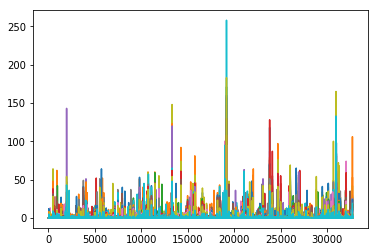

In [21]:

cycle = ar_pbmc[0:50]
for i in cycle:
    plt.plot(i)  
plt.show()

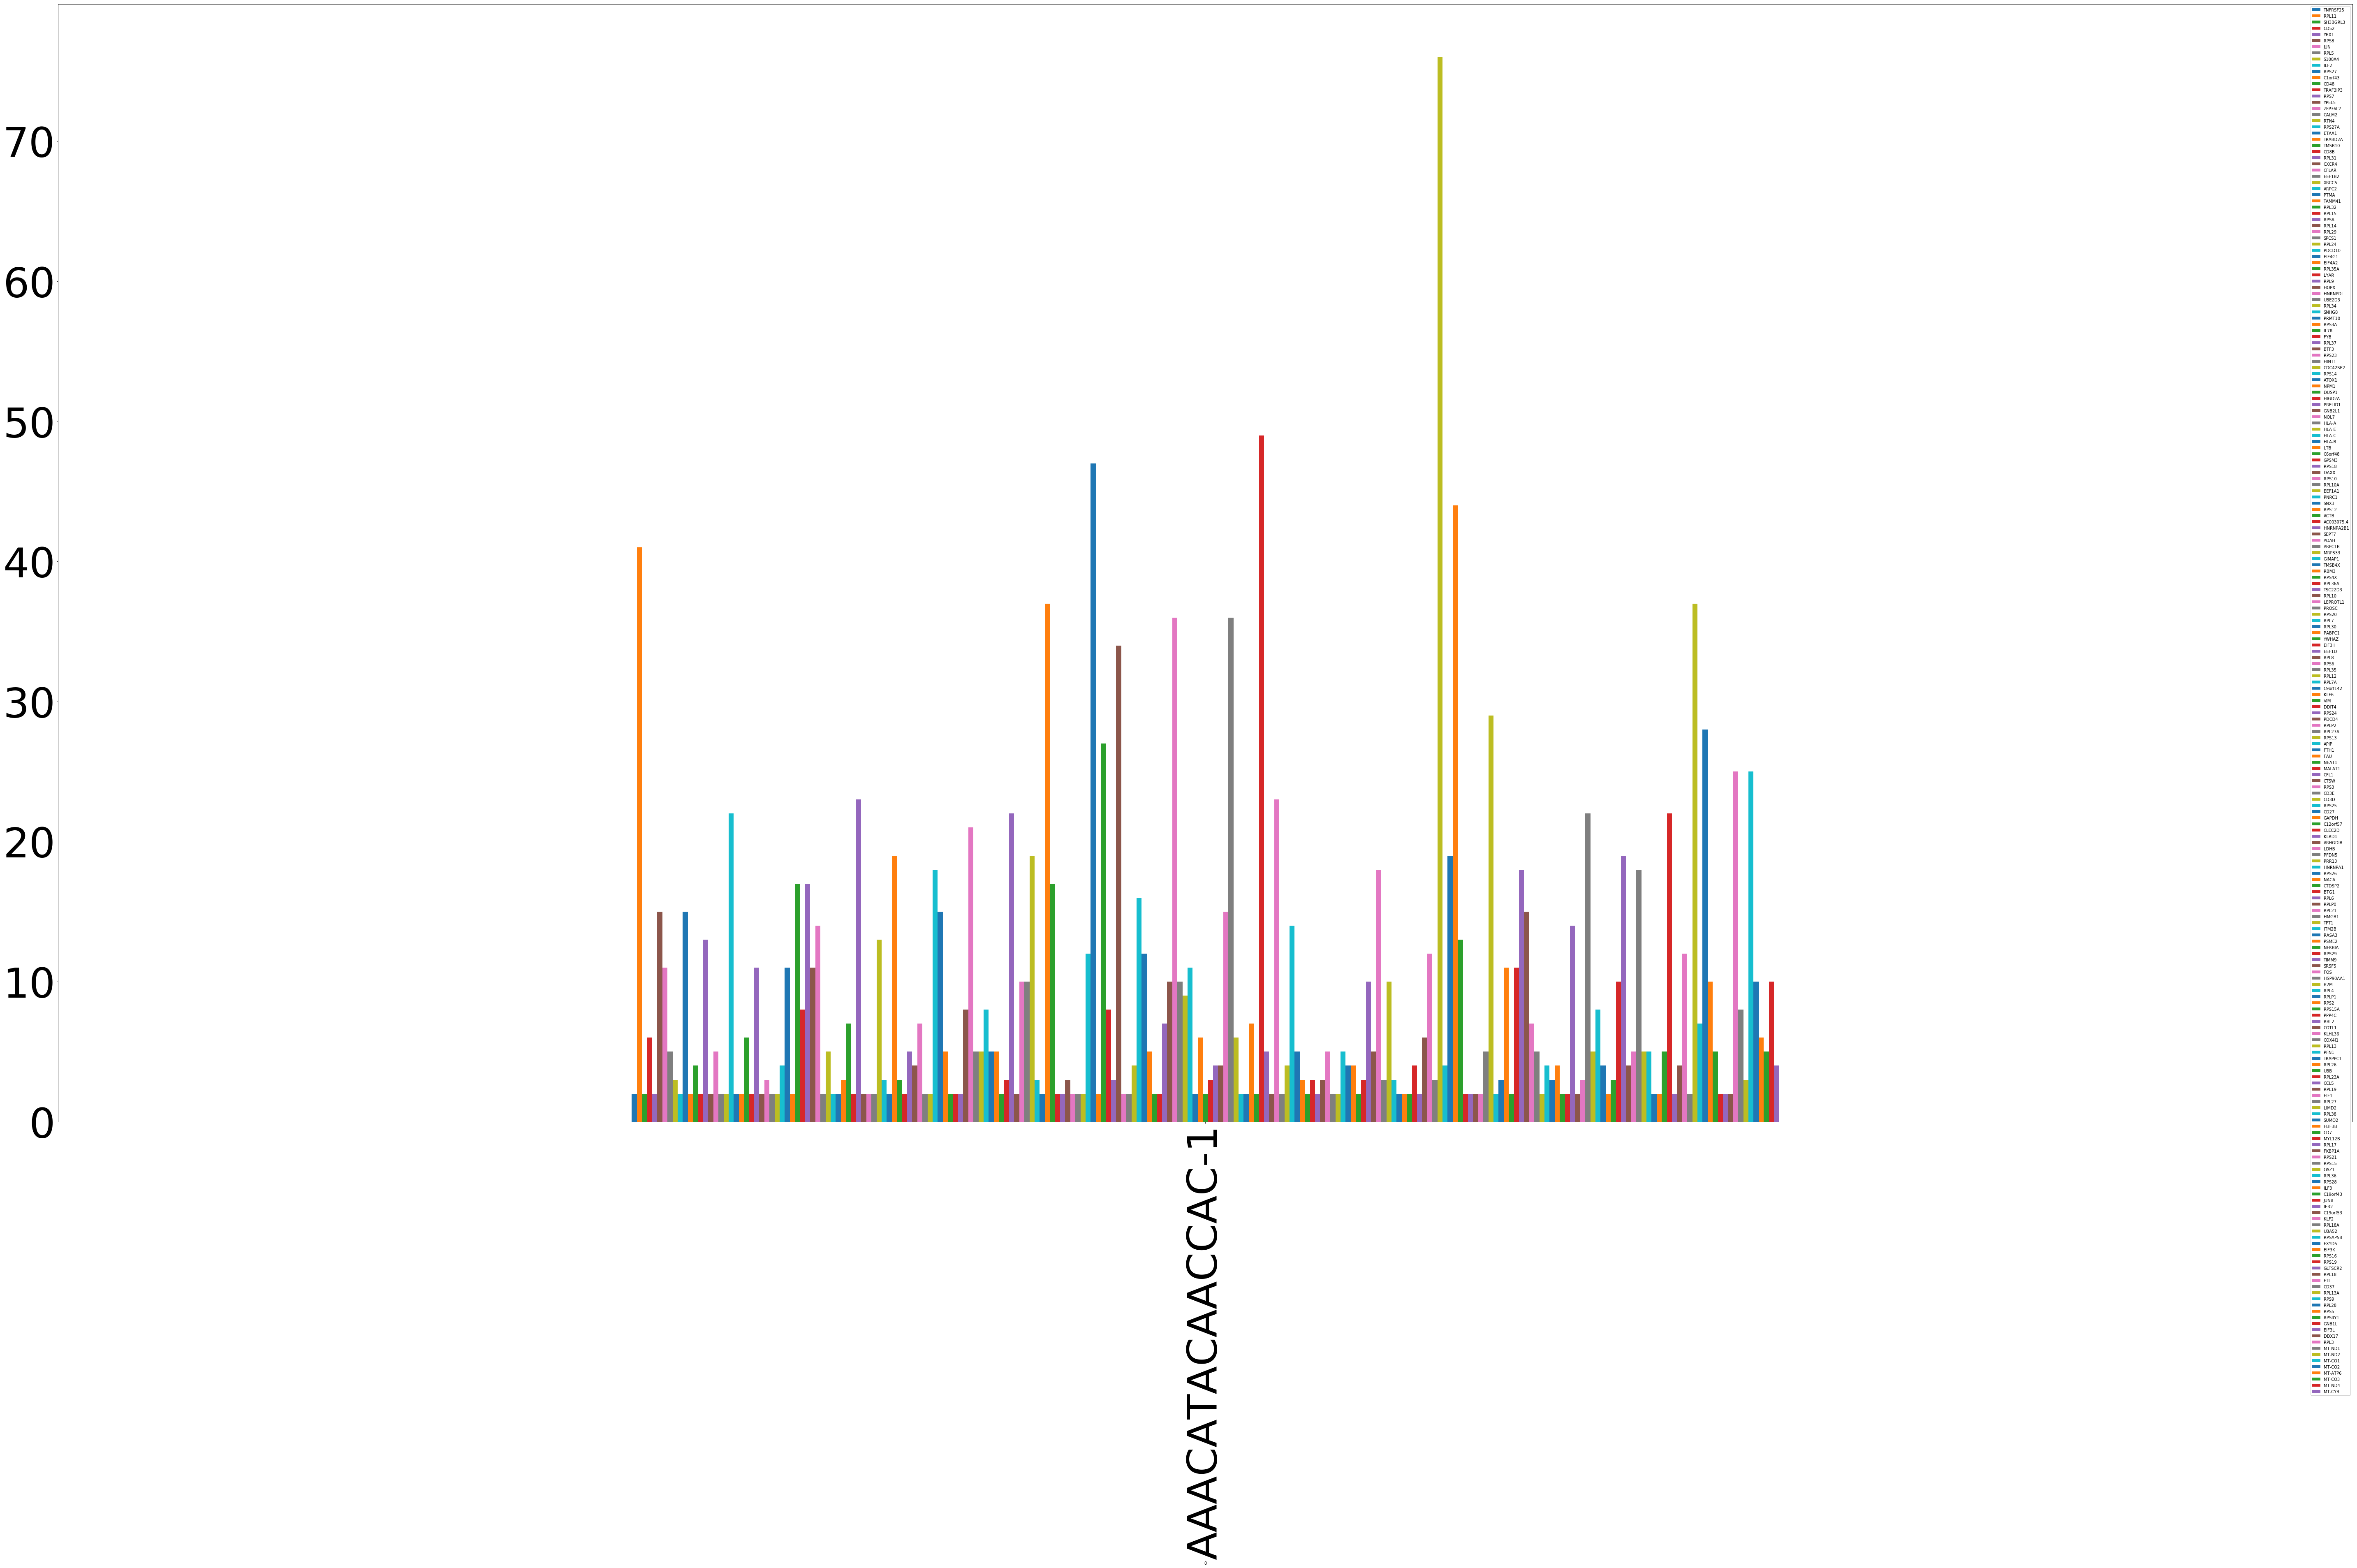

In [22]:
cycle = df_pbmc[0:1]
red_data = cycle.loc[:,cycle.loc["AAACATACAACCAC-1",:]>1]
red_data.plot(kind= "bar", legend = True, figsize = (100,50), fontsize = 100)
#cycle.plot(kind = "bar")

plt.show()

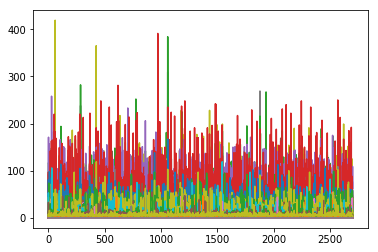

In [110]:
plt.plot(ar_pbmc)
plt.show()

#### Checking for a single gene

In [74]:
MS4A1 = df_pbmc["MS4A1"]
bla = []
for i in MS4A1:
    if i !=0:
        bla.append(i)
print(bla)

[6.0, 1.0, 1.0, 1.0, 36.0, 1.0, 2.0, 2.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 6.0, 2.0, 1.0, 1.0, 3.0, 1.0, 3.0, 12.0, 1.0, 5.0, 1.0, 2.0, 4.0, 1.0, 3.0, 4.0, 1.0, 6.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 10.0, 3.0, 2.0, 5.0, 4.0, 3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 6.0, 4.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 5.0, 3.0, 1.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 4.0, 6.0, 3.0, 1.0, 4.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 7.0, 1.0, 1.0, 6.0, 5.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 4.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 1.0, 5.0, 1.0, 14.0, 1.0, 4.0, 4.0, 1.0, 6.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 

In [24]:
import random
random.randint(1,len(rows))



967